In [3]:
import tensorflow as tf
from tensorflow import keras
import keras
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import glob

In [12]:
def plot(history):
    plt.figure(figsize=(18.5, 7.5))
 
    plt.subplot(1,2,1)
    sns.lineplot(x=history.epoch, y=history.history['loss'],  label='Train Loss', color='green',)
    sns.lineplot(x=history.epoch, y=history.history['val_loss'],  label='Val Loss', color='red',)
    sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='Train Accuracy', color='blue')
    sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='Val Accuracy', color='purple')
    plt.title('Loss train \ val, Accurancy train \ val')
    plt.legend(loc='best')
 
    plt.subplot(1,2,2)
    sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='Train Accuracy', color='blue')
    sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='Val Accuracy', color='purple')
    plt.title('Accuracy train \ val')
    plt.legend(loc='best')
 
    plt.show()

In [5]:
path = "C:/Users/wojte/Desktop/IV/Projekt_indywidualny/Face_Mask_1_dataset_split/"

In [6]:
imggen = ImageDataGenerator(rescale=1./255)

# load train data
train = imggen.flow_from_directory( path + 'train/', class_mode="categorical", batch_size=16, target_size=(64, 64), color_mode='grayscale')
# load val data
val = imggen.flow_from_directory(path + 'val/', class_mode="categorical", batch_size=16, target_size=(64, 64), color_mode='grayscale')

Found 3853 images belonging to 3 classes.
Found 1100 images belonging to 3 classes.


In [7]:
for data_batch, labels in train:
    print(data_batch.shape)
    print(labels.shape)
    break
    
class_indices = train.class_indices
class_indices

(16, 64, 64, 1)
(16, 3)


{'fully_covered': 0, 'not_covered': 1, 'partially_covered': 2}

In [8]:
model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(AveragePooling2D(pool_size=(4, 4)))
 
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(AveragePooling2D(pool_size=(4, 4)))    
    
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 average_pooling2d (AverageP  (None, 32, 32, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 8, 8, 64)         0         
 ePooling2D)                                            

In [9]:
filepath_callbacks = 'callbacks/epoch-{epoch:02d}-{val_loss:.2f}.hdf5'

In [10]:
keras_callbacks   = [
    EarlyStopping(monitor='val_accuracy', patience=10, mode='max'),
    ModelCheckpoint(filepath_callbacks, monitor='val_loss', save_best_only=True, mode='min')]

In [11]:
history = model.fit(train,
                    validation_data=val, 
                    epochs = 25
                   )

Epoch 1/25
241/241 [==============================] - 13s 22ms/step - loss: 0.7141 - accuracy: 0.6930 - val_loss: 0.5402 - val_accuracy: 0.7964
Epoch 2/25
241/241 [==============================] - 3s 14ms/step - loss: 0.5066 - accuracy: 0.7926 - val_loss: 0.5098 - val_accuracy: 0.7900
Epoch 3/25
241/241 [==============================] - 3s 14ms/step - loss: 0.3485 - accuracy: 0.8606 - val_loss: 0.3695 - val_accuracy: 0.8673
Epoch 4/25
241/241 [==============================] - 3s 14ms/step - loss: 0.2190 - accuracy: 0.9240 - val_loss: 0.1721 - val_accuracy: 0.9482
Epoch 5/25
241/241 [==============================] - 3s 14ms/step - loss: 0.1581 - accuracy: 0.9468 - val_loss: 0.1164 - val_accuracy: 0.9609
Epoch 6/25
241/241 [==============================] - 3s 14ms/step - loss: 0.1135 - accuracy: 0.9634 - val_loss: 0.1086 - val_accuracy: 0.9673
Epoch 7/25
241/241 [==============================] - 3s 14ms/step - loss: 0.0838 - accuracy: 0.9746 - val_loss: 0.1280 - val_accuracy: 0.960

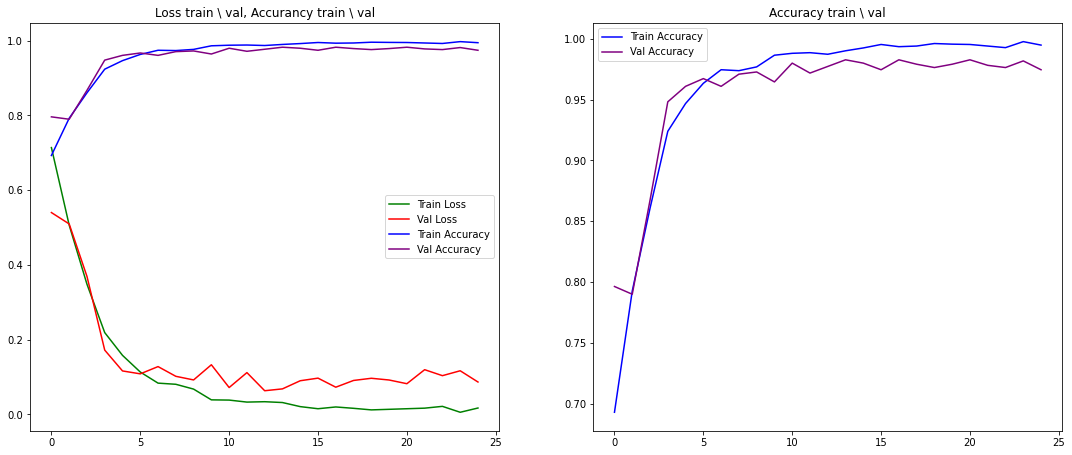

In [13]:
plot(history)

In [14]:
model.save('model_dataset1_v2.h5')

In [11]:
def evaluate_test(test_path):
    class_1 = [0,0,0]
    class_2 = [0,0,0]
    class_3 = [0,0,0]

    for i in list(glob.glob(test_path+'/fully_covered/*')):
        image = keras.preprocessing.image.load_img(i, target_size=(64, 64), color_mode = "grayscale")
        input_arr = keras.preprocessing.image.img_to_array(image) /255.0
        input_arr = np.array([input_arr])
        result = model.predict(input_arr)
        result = np.argmax(result)
        class_1[result] = class_1[result] + 1
        if result != 0:
            print(i)
    print('Koniec dla klasy 1')
        
    for i in list(glob.glob(test_path+'/not_covered/*')):
        image = keras.preprocessing.image.load_img(i, target_size=(64, 64), color_mode = "grayscale")
        input_arr = keras.preprocessing.image.img_to_array(image) /255.0
        input_arr = np.array([input_arr])
        result = model.predict(input_arr)
        result = np.argmax(result)
        class_2[result] = class_2[result] + 1
        if result != 1:
            print(i)
    print('Koniec dla klasy 2')
        
    for i in list(glob.glob(test_path+'/partially_covered/*')):
        image = keras.preprocessing.image.load_img(i, target_size=(64, 64), color_mode = "grayscale")
        input_arr = keras.preprocessing.image.img_to_array(image) /255.0
        input_arr = np.array([input_arr])
        result = model.predict(input_arr)
        result = np.argmax(result)
        class_3[result] = class_3[result] + 1
        if result != 2:
            print(i)
    
    return [class_1, class_2, class_3]

In [12]:
path_test = 'C:/Users/wojte/Desktop/IV/Projekt_indywidualny/Face_Mask_1_dataset_split/test'
output = evaluate_test(path_test)
output

C:/Users/wojte/Desktop/IV/Projekt_indywidualny/Face_Mask_1_dataset_split/test/fully_covered\brrlhkdd.jpg
C:/Users/wojte/Desktop/IV/Projekt_indywidualny/Face_Mask_1_dataset_split/test/fully_covered\bvtcuvyf.jpg
C:/Users/wojte/Desktop/IV/Projekt_indywidualny/Face_Mask_1_dataset_split/test/fully_covered\cgzwwfjo.jpg
C:/Users/wojte/Desktop/IV/Projekt_indywidualny/Face_Mask_1_dataset_split/test/fully_covered\ckwqzfin.jpg
C:/Users/wojte/Desktop/IV/Projekt_indywidualny/Face_Mask_1_dataset_split/test/fully_covered\hclfxrhc.jpg
C:/Users/wojte/Desktop/IV/Projekt_indywidualny/Face_Mask_1_dataset_split/test/fully_covered\mpefdjsj.jpg
C:/Users/wojte/Desktop/IV/Projekt_indywidualny/Face_Mask_1_dataset_split/test/fully_covered\mpjjrjvw.jpg
C:/Users/wojte/Desktop/IV/Projekt_indywidualny/Face_Mask_1_dataset_split/test/fully_covered\ourembbh.jpg
C:/Users/wojte/Desktop/IV/Projekt_indywidualny/Face_Mask_1_dataset_split/test/fully_covered\qvkhrsqr.jpg
C:/Users/wojte/Desktop/IV/Projekt_indywidualny/Face_Mas

[[134, 9, 3], [4, 364, 0], [5, 1, 34]]

<AxesSubplot:>

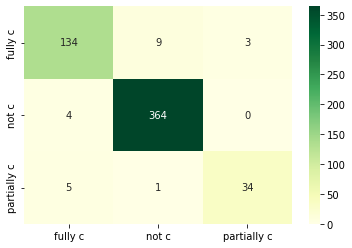

In [13]:
x_axis = ['fully c', 'not c', 'partially c']
sns.heatmap(output, cmap='YlGn', annot=True, fmt='d', xticklabels=x_axis, yticklabels=x_axis)